In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [2]:
# Load dataset
def load_data():
    data = pd.read_csv('tweets_22march_corona.csv')
    return data

In [3]:
tweet_df = load_data()
tweet_df.head()

,Unnamed: 0,text,Username,Timestamp,lenght,location,device,RT,Reply,sentiment
0,0,RT @Shehzad_Ind: I understand you guys have an election coming up against @realDonaldTrump - do ...,AbDgR81,Wed Mar 04 03:20:15 +0000 2020,144,"Roha Ashtami, India",Android,True,NaN,0.0000
1,1,"RT @Sridhar_Jeri: Tow days back Chilkur Balaji priest said ""Balaji saved India from Coronavirus....",ukekunal,Wed Mar 04 03:20:15 +0000 2020,140,Waraseoni,Mobile device,True,NaN,0.6705
2,2,RT @fakir_sinyal: INDIA BRUTALITY\nto #IndianMuslims by @narendramodi\n #GenocideOfIndianMuslim\...,SandhookAwaken1,Wed Mar 04 03:20:15 +0000 2020,140,Bumi Allah,Android,True,NaN,-0.6940
3,3,RT @rajeev_mp: Welcome to #Britain - a nation enjoying “benefits” n warm feeling of migrants tht...,Vaibhavh1981,Wed Mar 04 03:20:16 +0000 2020,140,"Mumbai, India",Android,True,NaN,0.5719
4,4,Time to focus on real threats instead of the imaginary ones,FORCEmagazine,Wed Mar 04 03:20:16 +0000 2020,59,Delhi,Android,False,NaN,-0.4215


In [5]:
print('Dataset size:',tweet_df.shape)
print('Columns are:',tweet_df.columns)

Dataset size: (141188, 10)
Columns are: Index(['Unnamed: 0', 'text', 'Username', 'Timestamp', 'lenght', 'location',
       'device', 'RT', 'Reply', 'sentiment'],
      dtype='object')


In [6]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tweet_df['Tweet_punct'] = tweet_df['text'].apply(lambda x: remove_punct(x))
tweet_df.head()

,Unnamed: 0,text,Username,Timestamp,lenght,location,device,RT,Reply,sentiment,Tweet_punct
0,0,RT @Shehzad_Ind: I understand you guys have an election coming up against @realDonaldTrump - do ...,AbDgR81,Wed Mar 04 03:20:15 +0000 2020,144,"Roha Ashtami, India",Android,True,NaN,0.0000,RT ShehzadInd I understand you guys have an election coming up against realDonaldTrump do keep ...
1,1,"RT @Sridhar_Jeri: Tow days back Chilkur Balaji priest said ""Balaji saved India from Coronavirus....",ukekunal,Wed Mar 04 03:20:15 +0000 2020,140,Waraseoni,Mobile device,True,NaN,0.6705,RT SridharJeri Tow days back Chilkur Balaji priest said Balaji saved India from Coronavirus He a...
2,2,RT @fakir_sinyal: INDIA BRUTALITY\nto #IndianMuslims by @narendramodi\n #GenocideOfIndianMuslim\...,SandhookAwaken1,Wed Mar 04 03:20:15 +0000 2020,140,Bumi Allah,Android,True,NaN,-0.6940,RT fakirsinyal INDIA BRUTALITY\nto IndianMuslims by narendramodi\n GenocideOfIndianMuslim\ndelhi...
3,3,RT @rajeev_mp: Welcome to #Britain - a nation enjoying “benefits” n warm feeling of migrants tht...,Vaibhavh1981,Wed Mar 04 03:20:16 +0000 2020,140,"Mumbai, India",Android,True,NaN,0.5719,RT rajeevmp Welcome to Britain a nation enjoying “benefits” n warm feeling of migrants tht come...
4,4,Time to focus on real threats instead of the imaginary ones,FORCEmagazine,Wed Mar 04 03:20:16 +0000 2020,59,Delhi,Android,False,NaN,-0.4215,Time to focus on real threats instead of the imaginary ones


In [7]:
#tweet_df.to_csv("tweets_data1.csv")
df1 = tweet_df[["Username","location","Tweet_punct"]]
df1.head()

,Username,location,Tweet_punct
0,AbDgR81,"Roha Ashtami, India",RT ShehzadInd I understand you guys have an election coming up against realDonaldTrump do keep ...
1,ukekunal,Waraseoni,RT SridharJeri Tow days back Chilkur Balaji priest said Balaji saved India from Coronavirus He a...
2,SandhookAwaken1,Bumi Allah,RT fakirsinyal INDIA BRUTALITY\nto IndianMuslims by narendramodi\n GenocideOfIndianMuslim\ndelhi...
3,Vaibhavh1981,"Mumbai, India",RT rajeevmp Welcome to Britain a nation enjoying “benefits” n warm feeling of migrants tht come...
4,FORCEmagazine,Delhi,Time to focus on real threats instead of the imaginary ones


E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


[53816, 36659, 50713]


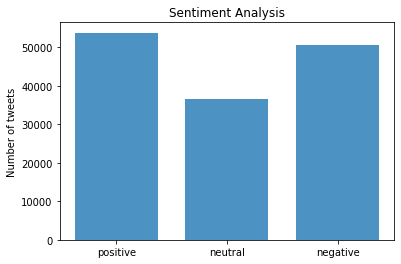

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
 
sentiment = SentimentIntensityAnalyzer()
df1['sentiment'] = df1.Tweet_punct.apply(lambda x: sentiment.polarity_scores(x)['compound'])
#sentiment.polarity_scores(text) #test method

pos = len(df1[df1.sentiment > 0])
neg = len(df1[df1.sentiment < 0])
neu = len(df1[df1.sentiment == 0])
y = [pos, neu, neg]	# vector of y-values
print(y)
plt.title("Sentiment Analysis")
plt.ylabel('Number of tweets')
plt.xticks(range(len(y)), ['positive', 'neutral', 'negative'])
plt.bar(range(len(y)), height=y, width = 0.75, align = 'center', alpha = 0.8)
plt.savefig('sentiments1.png')
plt.show()

In [9]:
# Tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

df1['Tweet_tokenized'] = df1['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df1.head()

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Username,location,Tweet_punct,sentiment,Tweet_tokenized
0,AbDgR81,"Roha Ashtami, India",RT ShehzadInd I understand you guys have an election coming up against realDonaldTrump do keep ...,0.0000,"[rt, shehzadind, i, understand, you, guys, have, an, election, coming, up, against, realdonaldtr..."
1,ukekunal,Waraseoni,RT SridharJeri Tow days back Chilkur Balaji priest said Balaji saved India from Coronavirus He a...,0.6705,"[rt, sridharjeri, tow, days, back, chilkur, balaji, priest, said, balaji, saved, india, from, co..."
2,SandhookAwaken1,Bumi Allah,RT fakirsinyal INDIA BRUTALITY\nto IndianMuslims by narendramodi\n GenocideOfIndianMuslim\ndelhi...,-0.6940,"[rt, fakirsinyal, india, brutality, to, indianmuslims, by, narendramodi, genocideofindianmuslim,..."
3,Vaibhavh1981,"Mumbai, India",RT rajeevmp Welcome to Britain a nation enjoying “benefits” n warm feeling of migrants tht come...,0.5719,"[rt, rajeevmp, welcome, to, britain, a, nation, enjoying, benefits, n, warm, feeling, of, migran..."
4,FORCEmagazine,Delhi,Time to focus on real threats instead of the imaginary ones,-0.4215,"[time, to, focus, on, real, threats, instead, of, the, imaginary, ones]"


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(df1['Tweet_punct'])
#vectorizer.vocabulary_

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=False, max_df=1.0, max_features=None, min_df=0,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [11]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='location', data=df1)
plt.title("Count of Country")
plt.show()

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2361 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2367 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2342 missing from current

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2331 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2338 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3244 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3270 missing from current

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2990 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3007 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2996 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3006 missing from current

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12365 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12427 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12367 missing from c

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 57143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2738 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2711 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2725 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2727 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2972 missing from curren

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2949 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3095 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3122 missing from curre

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2374 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2329 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2355 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49464 missing from curr

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56725 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3245 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3246 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48512 missing from curre

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2334 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3403 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3367 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56970 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3238 missing from curren

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2755 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2743 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2733 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56825 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3619 missing from curren

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33258 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 30001 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20043 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 57151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 1748 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2893 missing from cur

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2999 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 57256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2377 missing from cur

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56477 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56605 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3125 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2855 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2880 missing from curre

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56811 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23383 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21270 missing from c

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3119 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 3128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38738 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26408 missing from cur

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9193 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 65344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22856 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27178 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27996 missing from cu

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23830 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 19979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20816 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 57327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12507 missing from c

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9446 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9424 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 10071 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56331 missing from curre

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56651 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56625 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56460 missing from c

ValueError: 
Illustration Heaven$$$$$$
                   ^
Expected end of text, found '$'  (at char 19), (line:1, col:20)

<Figure size 432x288 with 1 Axes>

In [12]:
df1.loc[(df1.sentiment < 0), 'sent'] = -1  
df1.loc[(df1.sentiment == 0), 'sent'] = 0  
df1.loc[(df1.sentiment >0 ), 'sent'] = 1  
df1.to_csv('location_sentiment21march.csv')
df1.head(5)

E:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
E:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Username,location,Tweet_punct,sentiment,Tweet_tokenized,sent
0,AbDgR81,"Roha Ashtami, India",RT ShehzadInd I understand you guys have an election coming up against realDonaldTrump do keep ...,0.0000,"[rt, shehzadind, i, understand, you, guys, have, an, election, coming, up, against, realdonaldtr...",0.0
1,ukekunal,Waraseoni,RT SridharJeri Tow days back Chilkur Balaji priest said Balaji saved India from Coronavirus He a...,0.6705,"[rt, sridharjeri, tow, days, back, chilkur, balaji, priest, said, balaji, saved, india, from, co...",1.0
2,SandhookAwaken1,Bumi Allah,RT fakirsinyal INDIA BRUTALITY\nto IndianMuslims by narendramodi\n GenocideOfIndianMuslim\ndelhi...,-0.6940,"[rt, fakirsinyal, india, brutality, to, indianmuslims, by, narendramodi, genocideofindianmuslim,...",-1.0
3,Vaibhavh1981,"Mumbai, India",RT rajeevmp Welcome to Britain a nation enjoying “benefits” n warm feeling of migrants tht come...,0.5719,"[rt, rajeevmp, welcome, to, britain, a, nation, enjoying, benefits, n, warm, feeling, of, migran...",1.0
4,FORCEmagazine,Delhi,Time to focus on real threats instead of the imaginary ones,-0.4215,"[time, to, focus, on, real, threats, instead, of, the, imaginary, ones]",-1.0


In [13]:
one = df1.groupby('sent')
one.sum()

,sentiment
sent,
-1.0,-24168.9214
0.0,0.0000
1.0,25927.3904


In [14]:
df1.groupby(['sent','location']).size().reset_index().groupby('sent')[[0]].max()

,0
sent,
-1.0,3959
0.0,2871
1.0,3935


In [15]:
df1.groupby(['location']).groups.keys()


dict_keys(['\n', '\nᶠᵒʳ ᵏᵗʰ ', ' ', ' \n\n', '  ', '   ', '    ', '     ', '                     India', '   Jaipur ,India ', '  PS.99/NA.242..karachi', '  Shrigonda-Ahmadnagar', '  Up India.', '  uttarpradesh', '  world 🗺', ' #Kashmir', ' (Cr¥pt○ Space)Techy🛰🌞 INDIA', ' (KOLKATA.)', ' (UP60)  New Delhi, India', ' (india)', ' 2020 💟🔥🔥💟 #2097614560💟', ' 61ᴘᴀʀᴋʟᴏᴇʏ', ' 7', ' Ahemadabad, India', ' Aryavrata', ' At The Gates Of DON', ' At front foot.', ' Australia', ' BENGALURU, BHARAT. ', ' BHARAT', ' Ballia, India', ' Bangalore', ' Bangalore, Bharat.', ' Bangalore, India', ' Bareilly, India', ' Barts Health London, England ', ' Bay', ' Between bluepill and redpill.', ' Bharath', ' Bharatvarsh', ' Bihar Sharif India ', ' Bissau Rajasthan, India', ' Bookന്റെ ഉള്ളിൽ 📖📖😍📖📖', ' California', ' Chennai', ' Chennai, INDIA ', ' Churu Rajsthan ', ' D.H.A, Karachi, Pakistan', ' Delhi ', ' Delhi  NCR/ Jaipur', ' Dil wali Dilli❤️ ', ' Dreamland..(∩_∩)', ' Dulam, Uttarakhand', ' Earth', ' England 🏴\U0

In [16]:
len(df1.groupby(['location']).groups['mumbai']) #183

183

In [18]:
df1['location'].unique()

array(['Roha Ashtami, India', 'Waraseoni', 'Bumi Allah', ...,
       'Crash Landing On You', 'Bromley, Kent, UK',
       'Ahmedabad, Gujarat  '], dtype=object)

In [19]:
df1.groupby('location')['sent'].sum()

location
\n             0.0
\nᶠᵒʳ ᵏᵗʰ     -1.0
              12.0
 \n\n          0.0
              -2.0
              ... 
🤔              1.0
🤳              1.0
🥀utopia       -1.0
🥺🥺🥺            1.0
🥽              1.0
Name: sent, Length: 16384, dtype: float64

In [20]:
df1.head(6)

,Username,location,Tweet_punct,sentiment,Tweet_tokenized,sent
0,AbDgR81,"Roha Ashtami, India",RT ShehzadInd I understand you guys have an election coming up against realDonaldTrump do keep ...,0.0000,"[rt, shehzadind, i, understand, you, guys, have, an, election, coming, up, against, realdonaldtr...",0.0
1,ukekunal,Waraseoni,RT SridharJeri Tow days back Chilkur Balaji priest said Balaji saved India from Coronavirus He a...,0.6705,"[rt, sridharjeri, tow, days, back, chilkur, balaji, priest, said, balaji, saved, india, from, co...",1.0
2,SandhookAwaken1,Bumi Allah,RT fakirsinyal INDIA BRUTALITY\nto IndianMuslims by narendramodi\n GenocideOfIndianMuslim\ndelhi...,-0.6940,"[rt, fakirsinyal, india, brutality, to, indianmuslims, by, narendramodi, genocideofindianmuslim,...",-1.0
3,Vaibhavh1981,"Mumbai, India",RT rajeevmp Welcome to Britain a nation enjoying “benefits” n warm feeling of migrants tht come...,0.5719,"[rt, rajeevmp, welcome, to, britain, a, nation, enjoying, benefits, n, warm, feeling, of, migran...",1.0
4,FORCEmagazine,Delhi,Time to focus on real threats instead of the imaginary ones,-0.4215,"[time, to, focus, on, real, threats, instead, of, the, imaginary, ones]",-1.0
5,akdwaaz,India,Befitting response by MPs and Congressmen in UK USA and other countries to upload videos of viol...,-0.9260,"[befitting, response, by, mps, and, congressmen, in, uk, usa, and, other, countries, to, upload,...",-1.0


In [36]:
df2 = pd.DataFrame([[1.1, 1.1, 1.1, 2.6, 2.5, 3.4,2.6,2.6,3.4,3.4,2.6,1.1,1.1,3.3], list('AAABBBBABCBDDD'), [1.1, 1.7, 2.5, 2.6, 3.3, 3.8,4.0,4.2,4.3,4.5,4.6,4.7,4.7,4.8], ['x/y/z','x/y','x/y/z/n','x/u','x','x/u/v','x/y/z','x','x/u/v/b','-','x/y','x/y/z','x','x/u/v/w'],['1','3','3','2','4','2','5','3','6','3','5','1','1','1']]).T
df2.columns = ['col1','col2','col3','col4','col5']
df2

,col1,col2,col3,col4,col5
0,1.1,A,1.1,x/y/z,1
1,1.1,A,1.7,x/y,3
2,1.1,A,2.5,x/y/z/n,3
3,2.6,B,2.6,x/u,2
4,2.5,B,3.3,x,4
5,3.4,B,3.8,x/u/v,2
6,2.6,B,4,x/y/z,5
7,2.6,A,4.2,x,3
8,3.4,B,4.3,x/u/v/b,6
9,3.4,C,4.5,-,3


In [37]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [38]:
df2.groupby(['col5','col2']).size().reset_index().groupby('col2')[[0]].max()

,0
col2,
A,3
B,2
C,1
D,3


In [44]:
from nltk.corpus import stopwords
loc1 = df1['location']
loc1

0          Roha Ashtami, India
1                    Waraseoni
2                   Bumi Allah
3                Mumbai, India
4                        Delhi
                  ...         
141183                     NaN
141184           Gondia, India
141185       Bromley, Kent, UK
141186    Ahmedabad, Gujarat  
141187                     NaN
Name: location, Length: 141188, dtype: object

In [48]:
#print(string.punctuation) ## !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
#table = str.maketrans('', '', string.punctuation)
# split into words by white space
words = loc1.str.split()
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
#stripped = [w.translate(table) for w in words]
stripped = [remove_punctuation(w) for w in words]
print(stripped[:100])

NameError: name 'remove_punctuation' is not defined

In [46]:
df1["location"].str.split()

0         [Roha, Ashtami,, India]
1                     [Waraseoni]
2                   [Bumi, Allah]
3                [Mumbai,, India]
4                         [Delhi]
                   ...           
141183                        NaN
141184           [Gondia,, India]
141185      [Bromley,, Kent,, UK]
141186      [Ahmedabad,, Gujarat]
141187                        NaN
Name: location, Length: 141188, dtype: object

In [40]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df1["location"])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

NameError: name 'stem' is not defined

In [31]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df1['Tweet_nonstop'] = df1['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df1.head(10)

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Username,location,Tweet_punct,sentiment,Tweet_tokenized,sent,Tweet_nonstop
0,AbDgR81,"Roha Ashtami, India",RT ShehzadInd I understand you guys have an election coming up against realDonaldTrump do keep ...,0.0000,"[rt, shehzadind, i, understand, you, guys, have, an, election, coming, up, against, realdonaldtr...",0.0,"[rt, shehzadind, understand, guys, election, coming, realdonaldtrump, keep, country, amp, religi..."
1,ukekunal,Waraseoni,RT SridharJeri Tow days back Chilkur Balaji priest said Balaji saved India from Coronavirus He a...,0.6705,"[rt, sridharjeri, tow, days, back, chilkur, balaji, priest, said, balaji, saved, india, from, co...",1.0,"[rt, sridharjeri, tow, days, back, chilkur, balaji, priest, said, balaji, saved, india, coronavi..."
2,SandhookAwaken1,Bumi Allah,RT fakirsinyal INDIA BRUTALITY\nto IndianMuslims by narendramodi\n GenocideOfIndianMuslim\ndelhi...,-0.6940,"[rt, fakirsinyal, india, brutality, to, indianmuslims, by, narendramodi, genocideofindianmuslim,...",-1.0,"[rt, fakirsinyal, india, brutality, indianmuslims, narendramodi, genocideofindianmuslim, delhivo..."
3,Vaibhavh1981,"Mumbai, India",RT rajeevmp Welcome to Britain a nation enjoying “benefits” n warm feeling of migrants tht come...,0.5719,"[rt, rajeevmp, welcome, to, britain, a, nation, enjoying, benefits, n, warm, feeling, of, migran...",1.0,"[rt, rajeevmp, welcome, britain, nation, enjoying, benefits, n, warm, feeling, migrants, tht, co..."
4,FORCEmagazine,Delhi,Time to focus on real threats instead of the imaginary ones,-0.4215,"[time, to, focus, on, real, threats, instead, of, the, imaginary, ones]",-1.0,"[time, focus, real, threats, instead, imaginary, ones]"
5,akdwaaz,India,Befitting response by MPs and Congressmen in UK USA and other countries to upload videos of viol...,-0.9260,"[befitting, response, by, mps, and, congressmen, in, uk, usa, and, other, countries, to, upload,...",-1.0,"[befitting, response, mps, congressmen, uk, usa, countries, upload, videos, violence, hate, spee..."
6,DKushwah73,NaN,RT jihadwatchRS India Muslim rioters bore drill machine into head of yearold Hindu httpstcokaMeoJNq,-0.2500,"[rt, jihadwatchrs, india, muslim, rioters, bore, drill, machine, into, head, of, yearold, hindu,...",-1.0,"[rt, jihadwatchrs, india, muslim, rioters, bore, drill, machine, head, yearold, hindu, httpstcok..."
7,imzawed,NaN,RT selvininc lakh Hindus live and work in Saudi arabia\n lakh in UAE\n lakh in Oman\n lakh in Q...,0.0000,"[rt, selvininc, lakh, hindus, live, and, work, in, saudi, arabia, lakh, in, uae, lakh, in, oman,...",0.0,"[rt, selvininc, lakh, hindus, live, work, saudi, arabia, lakh, uae, lakh, oman, lakh, qatar, lak..."
8,coreypein,"Alberta, Canada",RT jslaternyc AzaanJavaid reports that Cisco is helping to implement restrictions on internet ac...,0.0000,"[rt, jslaternyc, azaanjavaid, reports, that, cisco, is, helping, to, implement, restrictions, on...",0.0,"[rt, jslaternyc, azaanjavaid, reports, cisco, helping, implement, restrictions, internet, access..."
9,Sanjeev06206049,NaN,RT Jassi GodMorningWednesday\nWednesdayThoughts\n Drug Free India\n Intoxicants\nshou...,0.5106,"[rt, jassi, godmorningwednesday, wednesdaythoughts, drug, free, india, intoxicants, should, not,...",1.0,"[rt, jassi, godmorningwednesday, wednesdaythoughts, drug, free, india, intoxicants, even, kept, ..."


In [12]:
# Stemming and Lemmetization
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df1['Tweet_stemmed'] = df1['Tweet_nonstop'].apply(lambda x: stemming(x))
df1.head()

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Username,location,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,Elsine_van_Os,NaN,Valuable research from foxit about a Chinese hacker groups global espionage operations operation...,"[valuable, research, from, foxit, about, a, chinese, hacker, groups, global, espionage, operatio...","[valuable, research, foxit, chinese, hacker, groups, global, espionage, operations, operationwocao]","[valuabl, research, foxit, chines, hacker, group, global, espionag, oper, operationwocao]"
1,Venkata64035530,"Tamil Nadu, India",CMOTamilNadu OfficeOfOPS narendramodi PMOIndia mailed to al nsitharamanoffc NATIONAL SECURITY IS...,"[cmotamilnadu, officeofops, narendramodi, pmoindia, mailed, to, al, nsitharamanoffc, national, s...","[cmotamilnadu, officeofops, narendramodi, pmoindia, mailed, al, nsitharamanoffc, national, secur...","[cmotamilnadu, officeofop, narendramodi, pmoindia, mail, al, nsitharamanoffc, nation, secur, iss..."
2,phlocksa,NaN,imagine genuinely hunting for more than one shiny pokemon instead of hacking them in,"[imagine, genuinely, hunting, for, more, than, one, shiny, pokemon, instead, of, hacking, them, in]","[imagine, genuinely, hunting, one, shiny, pokemon, instead, hacking]","[imagin, genuin, hunt, one, shini, pokemon, instead, hack]"
3,theharpoonman,"Columbia, California",I just hate when they force you to subscribe to their paper for a dollar before you can read the...,"[i, just, hate, when, they, force, you, to, subscribe, to, their, paper, for, a, dollar, before,...","[hate, force, subscribe, paper, dollar, read, article]","[hate, forc, subscrib, paper, dollar, read, articl]"
4,Venkata64035530,"Tamil Nadu, India",CMOTamilNadu OfficeOfOPS narendramodi PMOIndia mailed to al nsitharamanoffc NATIONAL SECURITY IS...,"[cmotamilnadu, officeofops, narendramodi, pmoindia, mailed, to, al, nsitharamanoffc, national, s...","[cmotamilnadu, officeofops, narendramodi, pmoindia, mailed, al, nsitharamanoffc, national, secur...","[cmotamilnadu, officeofop, narendramodi, pmoindia, mail, al, nsitharamanoffc, nation, secur, iss..."


In [13]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df1['Tweet_lemmatized'] = df1['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df1.head()

E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Username,location,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,Elsine_van_Os,NaN,Valuable research from foxit about a Chinese hacker groups global espionage operations operation...,"[valuable, research, from, foxit, about, a, chinese, hacker, groups, global, espionage, operatio...","[valuable, research, foxit, chinese, hacker, groups, global, espionage, operations, operationwocao]","[valuabl, research, foxit, chines, hacker, group, global, espionag, oper, operationwocao]","[valuable, research, foxit, chinese, hacker, group, global, espionage, operation, operationwocao]"
1,Venkata64035530,"Tamil Nadu, India",CMOTamilNadu OfficeOfOPS narendramodi PMOIndia mailed to al nsitharamanoffc NATIONAL SECURITY IS...,"[cmotamilnadu, officeofops, narendramodi, pmoindia, mailed, to, al, nsitharamanoffc, national, s...","[cmotamilnadu, officeofops, narendramodi, pmoindia, mailed, al, nsitharamanoffc, national, secur...","[cmotamilnadu, officeofop, narendramodi, pmoindia, mail, al, nsitharamanoffc, nation, secur, iss...","[cmotamilnadu, officeofops, narendramodi, pmoindia, mailed, al, nsitharamanoffc, national, secur..."
2,phlocksa,NaN,imagine genuinely hunting for more than one shiny pokemon instead of hacking them in,"[imagine, genuinely, hunting, for, more, than, one, shiny, pokemon, instead, of, hacking, them, in]","[imagine, genuinely, hunting, one, shiny, pokemon, instead, hacking]","[imagin, genuin, hunt, one, shini, pokemon, instead, hack]","[imagine, genuinely, hunting, one, shiny, pokemon, instead, hacking]"
3,theharpoonman,"Columbia, California",I just hate when they force you to subscribe to their paper for a dollar before you can read the...,"[i, just, hate, when, they, force, you, to, subscribe, to, their, paper, for, a, dollar, before,...","[hate, force, subscribe, paper, dollar, read, article]","[hate, forc, subscrib, paper, dollar, read, articl]","[hate, force, subscribe, paper, dollar, read, article]"
4,Venkata64035530,"Tamil Nadu, India",CMOTamilNadu OfficeOfOPS narendramodi PMOIndia mailed to al nsitharamanoffc NATIONAL SECURITY IS...,"[cmotamilnadu, officeofops, narendramodi, pmoindia, mailed, to, al, nsitharamanoffc, national, s...","[cmotamilnadu, officeofops, narendramodi, pmoindia, mailed, al, nsitharamanoffc, national, secur...","[cmotamilnadu, officeofop, narendramodi, pmoindia, mail, al, nsitharamanoffc, nation, secur, iss...","[cmotamilnadu, officeofops, narendramodi, pmoindia, mailed, al, nsitharamanoffc, national, secur..."


In [22]:
df.head()

,text,location
0,"RT @vijayrpandey: Today is #ConstitutionDay. On this day in 1949, Constitution was adopted which...",NaN
1,In which world are you living or blabbering ur employer editorial policy.Fac is that SINGLE ..M ...,NaN
2,"RT @ARanganathan72: If Lord Rama is not part of your culture, you are NOT a perfect Muslim; let ...","Hyderabad, India"
3,"RT @RavinarIN: Why only Political parties as ""Anti-Modi forces""?... The two Chamelis here... @Ra...",NaN
4,RT @c_aashish: Japan Won’t Sign China-Backed RCEP Trade Deal If India Doesn’t Join\n\nAbe seeks ...,"Hyderabad, India"


In [33]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df1["location"])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

NameError: name 'ps' is not defined